In [1]:
# Import library diperlukan
import pandas as pd
import os
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report

In [2]:
# Path ke dataset (gunakan raw string untuk handle backslash)
dataset_path = r"D:\1 Kuliah\Semester 4\A.I\pertemuan 13\data_set"

# Cek semua file dalam folder
file_list = os.listdir(dataset_path)
print("File dalam folder:", file_list)

# Load dataset (asumsi file CSV)
# Sesuaikan nama file dengan yang ada di folder Anda
try:
    df = pd.read_csv(os.path.join(dataset_path, 'student-mat.csv'), delimiter=';')
except FileNotFoundError:
    print("Error: File tidak ditemukan. Pastikan:")
    print("- Nama file sesuai")
    print("- Format file CSV")
    print("- File tidak sedang terbuka di aplikasi lain")

File dalam folder: ['.student.zip_old', 'student-mat.csv', 'student-merge.R', 'student-por.csv', 'student.txt']


In [3]:
# Handle missing values
df = df.dropna()

# Encode variabel kategorikal
le = LabelEncoder()
categorical_cols = df.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Pisahkan fitur dan target
# Sesuaikan nama kolom target dengan dataset Anda
X = df.drop('G3', axis=1)  # Asumsi target di kolom 'G3'
y = df['G3']

In [4]:
# Split data training dan testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, 
    test_size=0.2,  # 20% data testing
    random_state=42
)

In [5]:
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [6]:
# Prediksi dan evaluasi
y_pred = model.predict(X_test)

print(f"Akurasi: {accuracy_score(y_test, y_pred):.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Akurasi: 0.20

Classification Report:
              precision    recall  f1-score   support

           0       0.22      0.40      0.29         5
           5       0.00      0.00      0.00         4
           6       0.14      0.17      0.15         6
           7       0.00      0.00      0.00         1
           8       0.60      0.50      0.55         6
           9       0.00      0.00      0.00         5
          10       1.00      0.09      0.17        11
          11       0.12      0.40      0.19         5
          12       0.00      0.00      0.00         5
          13       0.00      0.00      0.00         5
          14       1.00      0.33      0.50         6
          15       0.00      0.00      0.00        10
          16       0.23      0.75      0.35         4
          17       0.14      0.33      0.20         3
          18       0.17      1.00      0.29         1
          19       0.00      0.00      0.00         2

    accuracy                           0.2

c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modif

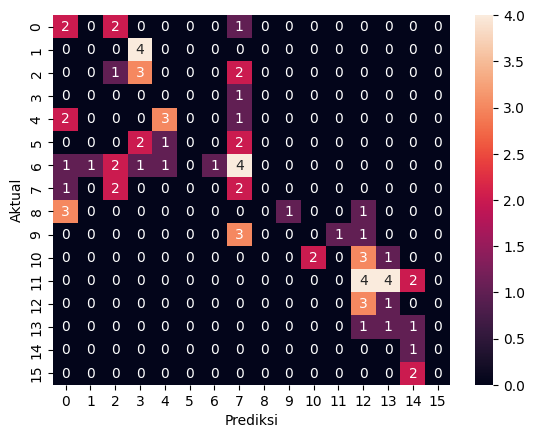

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Prediksi')
plt.ylabel('Aktual')
plt.show()